In [3]:
import mrcfile
import numpy as np
from ClassFiles.Denoiser import Denoiser
from ClassFiles.ut import find
import random
import matplotlib.pyplot as plt


BATCH_SIZE = 1
LEARNING_RATE = 0.00005
LOOPS = 5
STEPS = 1000

GT_PATH = '/local/scratch/public/sl767/MRC_Data/org/'
SGD_PATH = '/local/scratch/public/sl767/MRC_Data/Data_002_10k/SGD'
EM_PATH = '/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM'


NOISY_PATH = EM_PATH

train_list = []
for k in range(1, 9):
    train_list += find('{}*mult002_class001.mrc'.format(k), NOISY_PATH)
train_amount = len(train_list)
print('# Training data points: ' + str(train_amount))
#print(train_list)
eval_list = find('9*mult002_class001.mrc', NOISY_PATH)
eval_amount = len(eval_list)
#print(eval_list)
print('# Evaluation data points: ' + str(eval_amount))


# Training data points: 50
# Evaluation data points: 1


In [4]:
def locate_gt(noisy_path):
    pdb_id = noisy_path[-30: -26]
    L = find('*' + pdb_id + '.mrc', GT_PATH)
    if not len(L) == 1:
        raise ValueError('non-unique pdb id: ' + str(L))
    else:
#        print(pdb_id)
        return L[0]


def get_image(number, training):
    if training:
        L = train_list
    else:
        L = eval_list
    adv_path=L[number]
    with mrcfile.open(adv_path) as mrc:
        adv = mrc.data
    with mrcfile.open(locate_gt(adv_path)) as mrc:
        gt = mrc.data
    return gt, adv

In [9]:
def vis(gt, adv):
    plt.figure()
    plt.subplot(121)
    plt.imshow(np.mean(gt.squeeze(), axis=-1))
    plt.colorbar()
    plt.subplot(122)
    plt.imshow(np.mean(adv.squeeze(), axis=-1))
    plt.colorbar()
    plt.show()

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1O20/1O20_mult002_class001.mrc


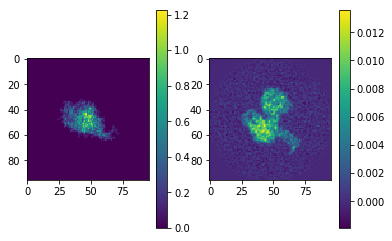

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1HUZ/1HUZ_mult002_class001.mrc


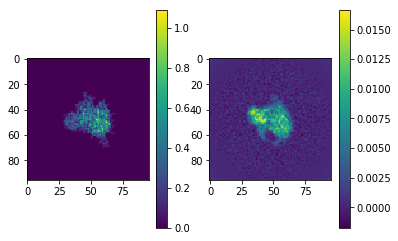

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1XSN/1XSN_mult002_class001.mrc


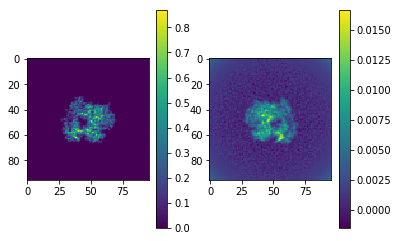

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1NJZ/1NJZ_mult002_class001.mrc


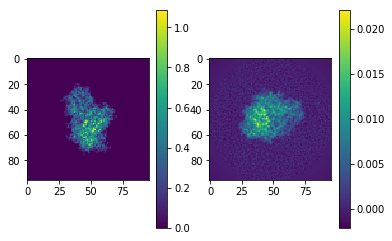

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/10MH/10MH_mult002_class001.mrc


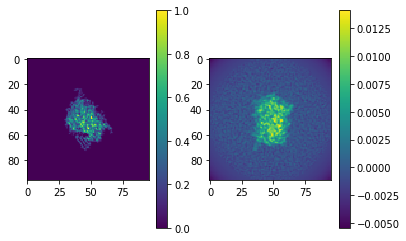

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1FOK/1FOK_mult002_class001.mrc


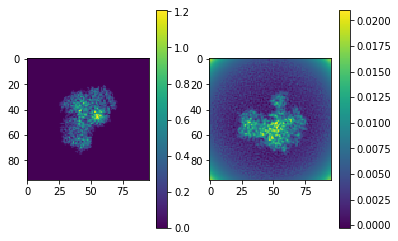

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1WD3/1WD3_mult002_class001.mrc


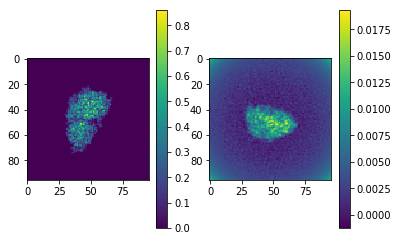

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1YQM/1YQM_mult002_class001.mrc


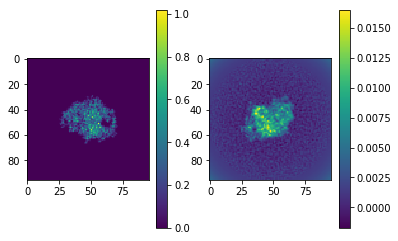

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1UUQ/1UUQ_mult002_class001.mrc


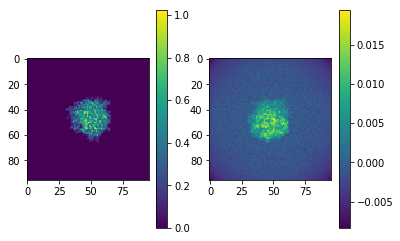

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1P7D/1P7D_mult002_class001.mrc


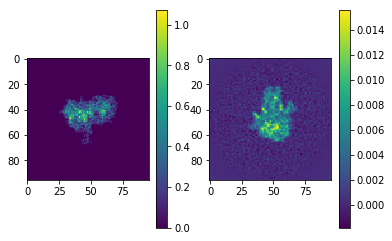

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1LML/1LML_mult002_class001.mrc


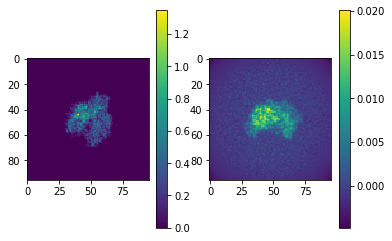

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1JY1/1JY1_mult002_class001.mrc


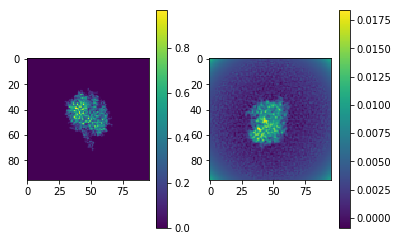

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1T1E/1T1E_mult002_class001.mrc


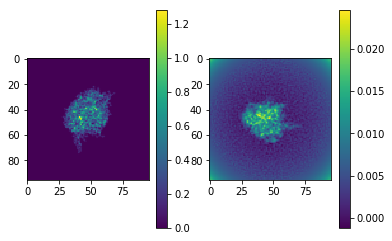

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1NH3/1NH3_mult002_class001.mrc


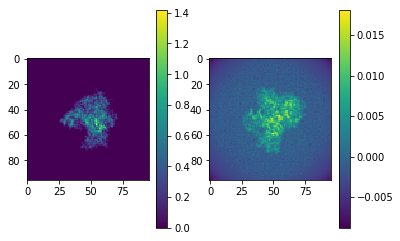

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1GCY/1GCY_mult002_class001.mrc


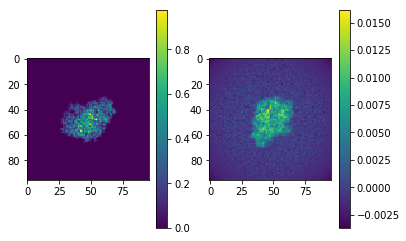

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1TZZ/1TZZ_mult002_class001.mrc


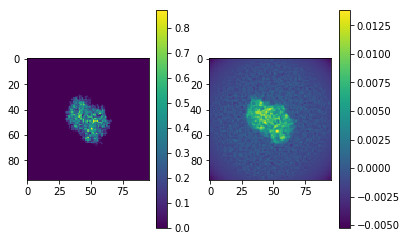

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1RVK/1RVK_mult002_class001.mrc


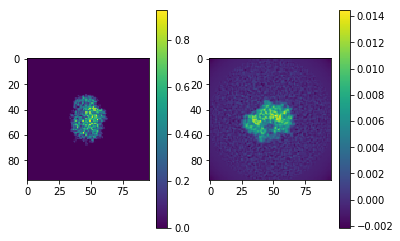

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1HP1/1HP1_mult002_class001.mrc


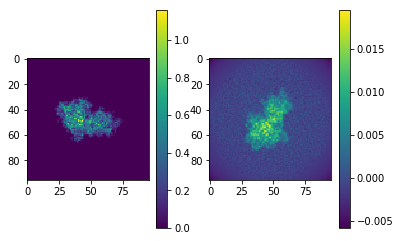

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1BPX/1BPX_mult002_class001.mrc


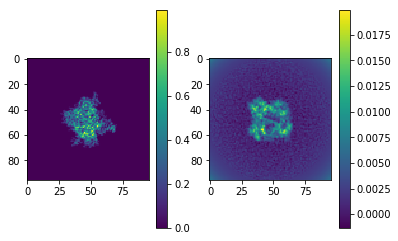

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/1QSY/1QSY_mult002_class001.mrc


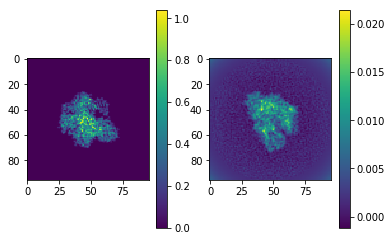

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3I62/3I62_mult002_class001.mrc


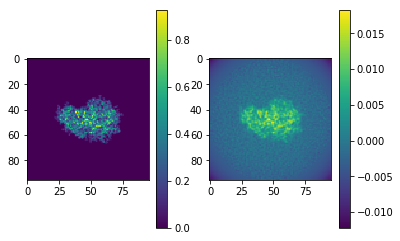

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3F8T/3F8T_mult002_class001.mrc


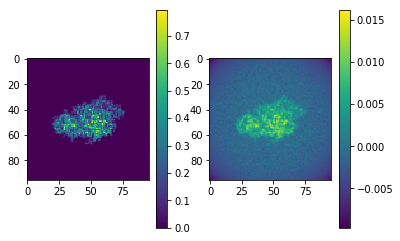

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3B7F/3B7F_mult002_class001.mrc


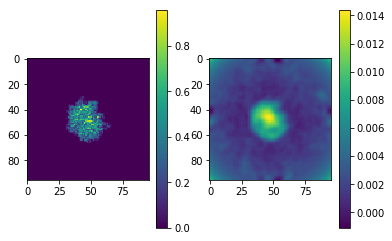

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3TAQ/3TAQ_mult002_class001.mrc


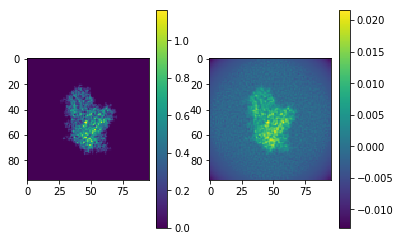

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3PNC/3PNC_mult002_class001.mrc


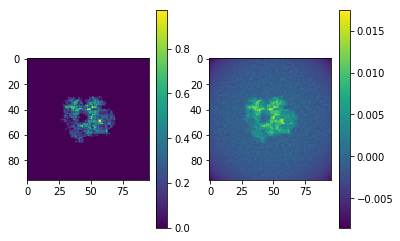

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3O8M/3O8M_mult002_class001.mrc


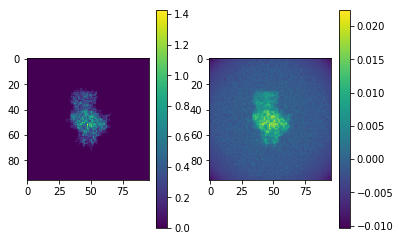

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3SI8/3SI8_mult002_class001.mrc


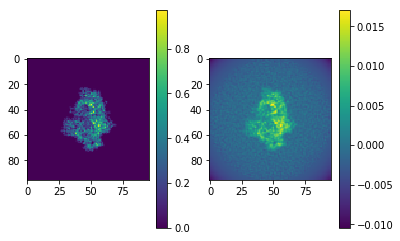

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3H1T/3H1T_mult002_class001.mrc


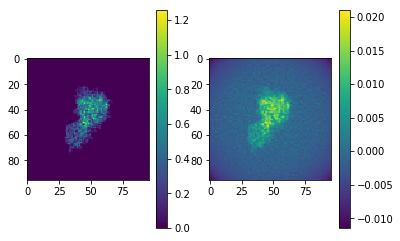

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3KQH/3KQH_mult002_class001.mrc


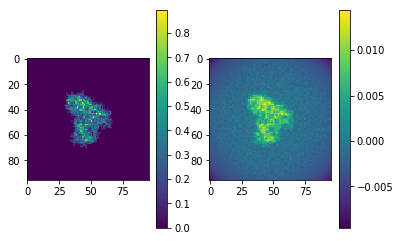

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3VOT/3VOT_mult002_class001.mrc


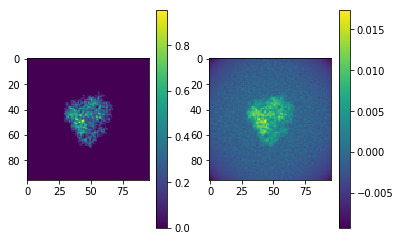

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3IKW/3IKW_mult002_class001.mrc


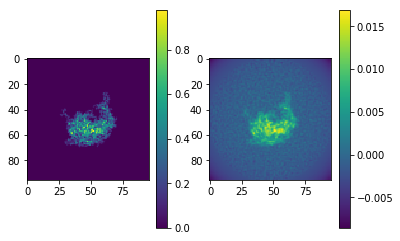

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3ME5/3ME5_mult002_class001.mrc


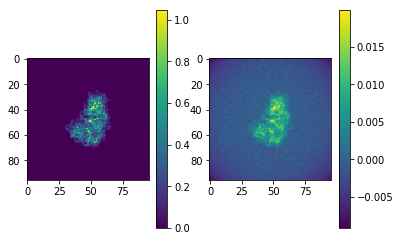

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3HPO/3HPO_mult002_class001.mrc


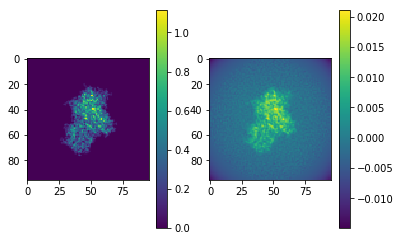

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3JPR/3JPR_mult002_class001.mrc


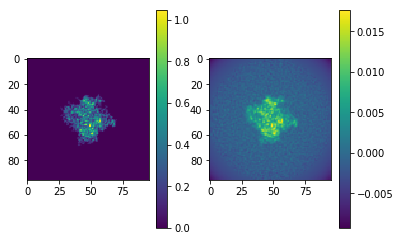

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3MR6/3MR6_mult002_class001.mrc


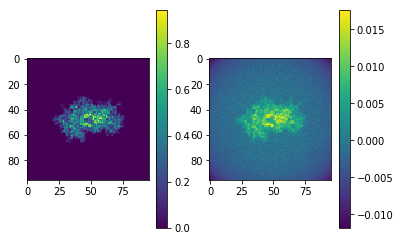

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3NVS/3NVS_mult002_class001.mrc


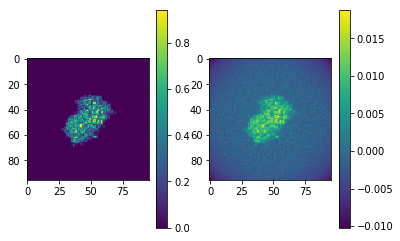

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3OYV/3OYV_mult002_class001.mrc


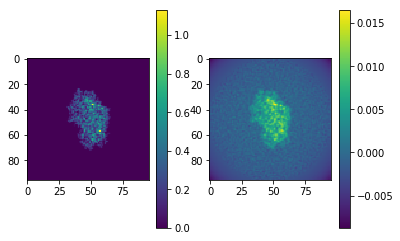

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3Q0R/3Q0R_mult002_class001.mrc


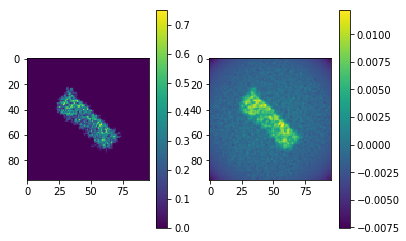

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3RJK/3RJK_mult002_class001.mrc


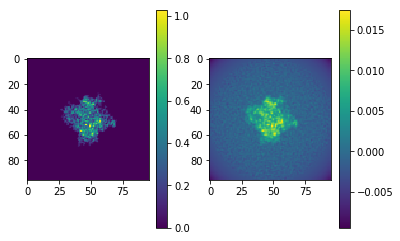

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3PO4/3PO4_mult002_class001.mrc


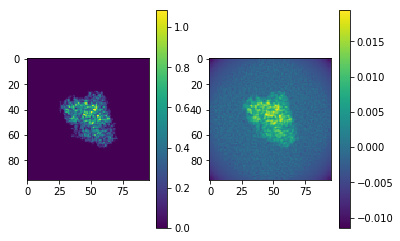

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3K7X/3K7X_mult002_class001.mrc


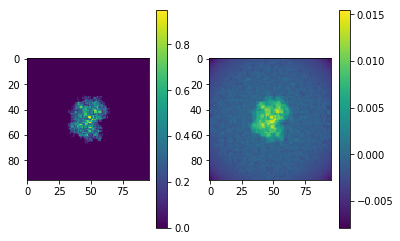

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3CPE/3CPE_mult002_class001.mrc


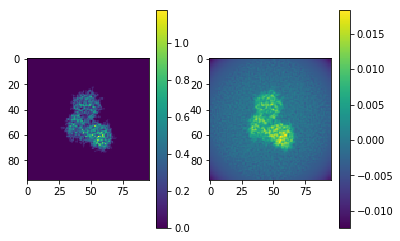

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3PR4/3PR4_mult002_class001.mrc


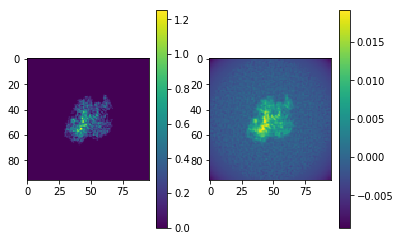

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3PE7/3PE7_mult002_class001.mrc


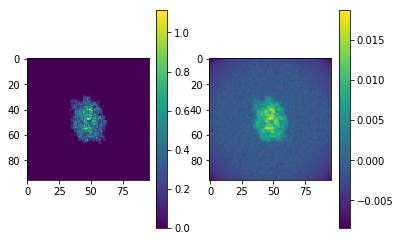

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3GP8/3GP8_mult002_class001.mrc


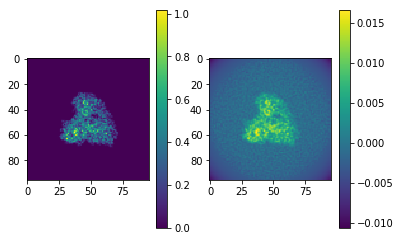

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3RJE/3RJE_mult002_class001.mrc


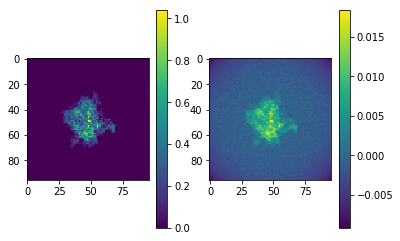

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3NKS/3NKS_mult002_class001.mrc


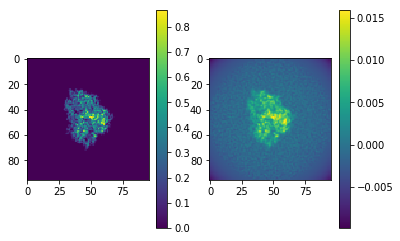

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3PJX/3PJX_mult002_class001.mrc


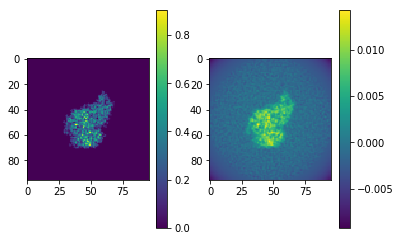

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3SQZ/3SQZ_mult002_class001.mrc


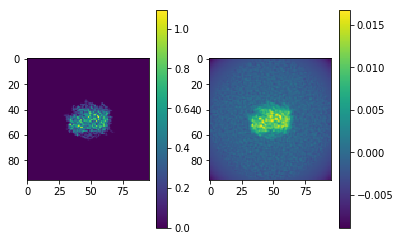

/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/3HL8/3HL8_mult002_class001.mrc


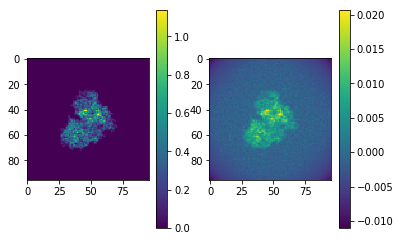

In [10]:
for n in range(train_amount):
    print(train_list[n])
    vis(*get_image(n, True))